In [1]:
from nucleotide.sequence import Sequence
import pandas as pd
from Bio import Entrez, SeqIO, Restriction

import matplotlib.pyplot as plt
import seaborn as sns

Entrez.email = "A.N.Other@example.com"

In [ ]:
accessions = pd.read_csv('./shabiha_bacteria_accessions.csv')
accessions.head()

In [ ]:
def fetch_seq_from_accession(accession):
    handle = Entrez.efetch(db="nucleotide", id=accession, rettype="fasta", retmode="text")
    record = SeqIO.read(handle, 'fasta')
    handle.close()
    seq = record.seq
    return str(seq)

In [ ]:
fetch_seq_from_accession("MN493874.1")

In [ ]:
accessions['sequence'] = accessions.apply(lambda i: fetch_seq_from_accession(i.accession), axis=1)
accessions.head()

In [ ]:
# Write CSV Output
accessions.to_csv('shabiha_ac_seq.csv', index=False)

## Directly import accession and sequences

In [2]:
accessions = pd.read_csv('./shabiha_ac_seq.csv')

In [3]:
accessions.tail()

,isolate,accession,species,sequence
67,M22,MN577384.1,Bacillus sp,GCGGCCTATACATGCAAGTCGAGCGGACAGATGGGAGCTTGCTCCC...
68,M25,MN577385.1,Stenotrophomonas sp.,CGGTGGCCTACCATGCAAGTCGAACGGCAGCACAGGAGAGCTTGCT...
69,M35,MN577386.1,Advenella sp.,CCTTACCCATGCAAGTCGAACGGCAGCGGGAAAGTAGCTTGCTACT...
70,M43,MN577388.1,Pseudomonas sp.,GGGCAGCCTACCATGCAAGTCGAGCGGATGAAGAGAGCTTGCTCTC...
71,M44,MN577389.1,Bacillus sp.,GCGGCTAATACATGCAAGTCGAGCGGACAGATGGGAGCTTGCTCCC...


In [4]:
# HaeIII Digestion
digestion = pd.DataFrame(columns=['size', 'isolate', 'fragment'])
for idx in accessions.index:
    isolate = accessions['isolate'][idx]
    seq = Sequence(accessions['sequence'][idx])
    haplotypes = seq.haplotypes(Restriction.MspI)
    for frg in haplotypes:
        digestion = digestion.append(pd.DataFrame([{"size": frg[0], "isolate": isolate, "fragment": str(frg[1])}]), ignore_index = True)
    
#Label Haplotypes Groupwise
digestion['haplotype'] = digestion.groupby(['size', 'isolate']).cumcount() + 1 # Assign serial number
digestion['haplotype'] = digestion['size'].astype(str) + '_' + digestion['haplotype'].astype(str) #digestion['isolate'] + '_' + 
#digestion.apply(lambda r: f'{r.isolate}_{r.haplotype}', axis=1)
digestion.head()   

,size,isolate,fragment,haplotype
0,432,K2,AAGGGGTGGCCTACACATGCAAGTCGAACGGCAGCACAGGAGAGCT...,432_1
1,660,K2,CGGCTAACTTCGTGCCAGCAGCCGCGGTAATACGAAGGGTGCAAGC...,660_1
2,91,K2,CGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCC...,91_1
3,82,K2,CGGATTGGAGTCTGCAACTCGACTCCATGAAGTCGGAATCGCTAGT...,82_1
4,88,K2,CGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTTTGTTGCAC...,88_1


In [5]:
digestion.describe()

,size,isolate,fragment,haplotype
count,429,429,429,429
unique,131,72,293,133
top,211,K86,CGGAACACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGAT...,211_1
freq,22,10,10,22


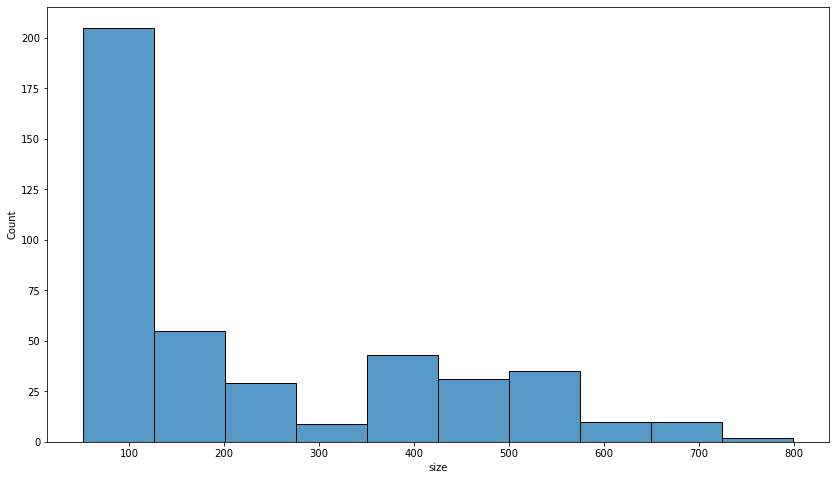

In [6]:
# View histogram of fragment sizes
plt.figure(figsize=(14, 8))
ax = sns.histplot(data=digestion, x="size")
plt.show()

In [10]:
# Filter particular fragment
digestion.loc[digestion['isolate'] == 'K85']

,size,isolate,fragment,haplotype
321,97,K85,CAAGTCGAGCGGAACTGGGGGAGCTTGCTCCTTCCAGTGTTAGCGG...,97_1
322,153,K85,CGGTGCTAATACCGAATAGTTTGGCGCCTCTCCTGAGGCGCTACGG...,153_1
323,247,K85,CGGCCACACTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCA...,247_1
324,452,K85,CGGAATTATTGGGCGTAAAGCGCGCGCAGGCGGTTCCTTAAGTCTG...,452_1
325,157,K85,CGGTGTAGAGATACGCCCTTTCCCTTCGGGGACAGCGGTGACAGGT...,157_1
326,163,K85,CGGAGGAAGGTGGGGATGACGTCAAATCATCATGCCCCTTATGACC...,163_1
327,97,K85,CGGGCCTTGTACACACCGCCCGTCACACCCCGAGAGTTTTAACACC...,97_2


In [11]:
# Filter particular fragment
digestion.loc[digestion['size'] == 97]

,size,isolate,fragment,haplotype
88,97,K22,TGCAAGTCGAGCGGATTGAAGGGAGCTTGCTCCCTGATATTAGCGG...,97_1
100,97,K26,CAAGTCGAGCGAATGGATTAAGAGCTTGCTCTTATGAAGTTAGCGG...,97_1
119,97,K31,CGGGCCTTGTACACACCGCCCGTCACACCACGAGAGTTTGTAACAC...,97_1
179,97,K49,CGGGTCTTGTACACACCGCCCGTCACACCACGAGAGTTTGTAACAC...,97_1
180,97,K50,TGCAAGTCGAGCGGACAGATGGGAGCTTGCTCCCTGATGTTAGCGG...,97_1
232,97,K63,CGGGCCTTGTACACACCGCCCGTCACACCACGAGAGTTTGTAACAC...,97_1
238,97,K64,CGGGCCTTGTACACACCGCCCGTCACACCACGAGAGTTTGTAACAC...,97_1
245,97,K66,CGGGTCTTGTACACACCGCCCGTCACACCACGAGAGTTTGTAACAC...,97_1
297,97,K75,CGGGCCTTGTACACACCGCCCGTCACACCACGAGAGTTTGTAACAC...,97_1
321,97,K85,CAAGTCGAGCGGAACTGGGGGAGCTTGCTCCTTCCAGTGTTAGCGG...,97_1


In [7]:
# Reshape the data to columnar form for binary matrix
digestion_bin = digestion[['size', 'isolate', 'haplotype']].pivot(index='haplotype', columns='isolate', values='size')
digestion_bin.head()

isolate,K10,K101,K11,K12,K13,K14,K15,K16,K18,K19,...,M11,M13,M17,M18,M22,M25,M3,M35,M43,M44
haplotype,,,,,,,,,,,,,,,,,,,,,
100_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,104,NaN,NaN,NaN,NaN,NaN,NaN
105_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,105,NaN,NaN,NaN
106_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Change NaN to 0
digestion_bin = digestion_bin.fillna(0)

# Change other values to 1
digestion_bin = digestion_bin.applymap(lambda x: 1 if x > 0 else 0)

# Sort by size
digestion_bin['size'] = [int(i.split('_')[0]) for i in digestion_bin.index]

digestion_bin = digestion_bin.sort_values(by=["size"], axis=0, ascending=False)

digestion_bin.tail()

isolate,K10,K101,K11,K12,K13,K14,K15,K16,K18,K19,...,M13,M17,M18,M22,M25,M3,M35,M43,M44,size
haplotype,,,,,,,,,,,,,,,,,,,,,
57_1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,57
54_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,54
53_1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,53
52_1,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,52
51_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,51


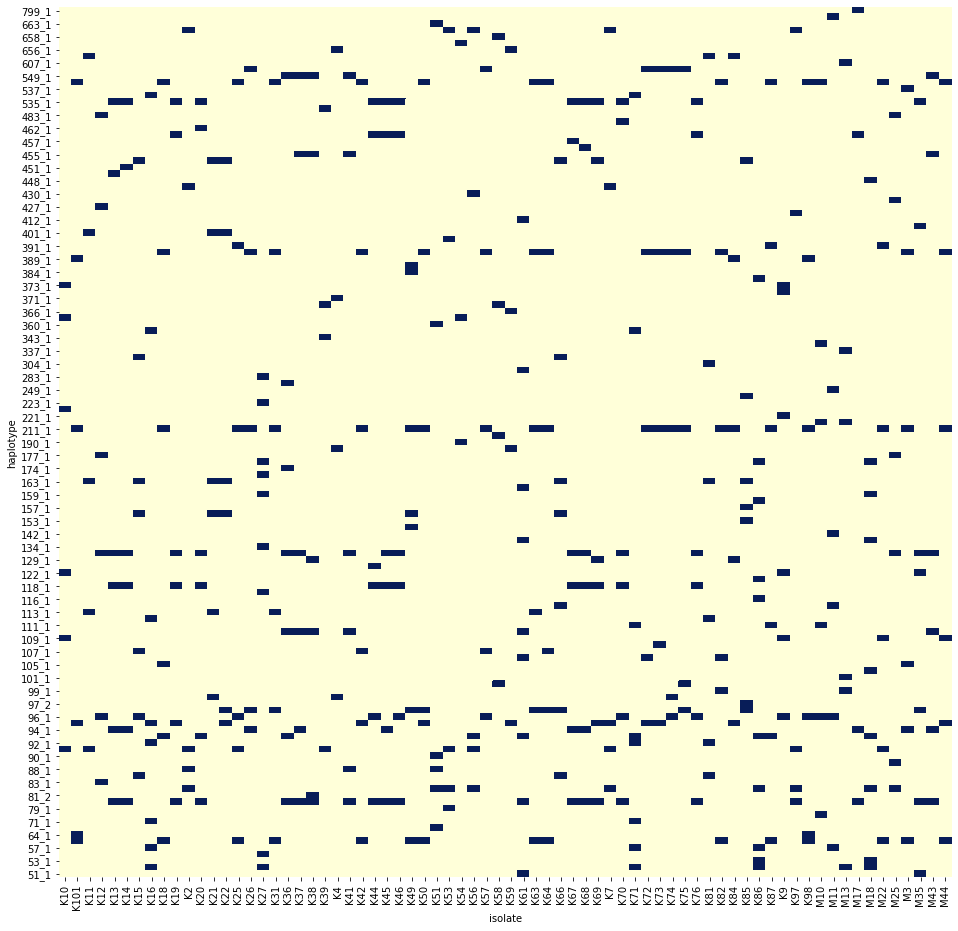

In [14]:
# View Heatmap
plt.figure(figsize=(16, 16))
ax = sns.heatmap(digestion_bin.drop('size', axis=1), cmap="YlGnBu", cbar=False)
plt.show()